# APPLYING CLUSTERING TECHNIQUES TO HAPPINESS DATASET

## INDEX

#### 1. SUMMARY OF THE DATASET
#### 2. DATA EXPLORATION
#### 3. K- MEANS CLUSTERING
        3.1. ELBOW METHOD
        3.2. SILHOUETTE COEFFICIENTS METHOD
#### 4. HIERARCHICAL CLUSTERING
        4.1. AGGLOMERATIVE CLUSTERING
            4.1.1. WARD'S LINKAGE METHOD
            4.1.2. SINGLE LINKAGE METHOD
            4.1.3. COMPLETE LINKAGE METHOD
            4.1.4. AVERAGE LINKAGE METHOD
#### 5. DENSITY BASED CLUSTERING          

## 1. SUMMARY OF THE DATASET

For clustering, we used 2019 World Happiness Report dataset which is a survey of the state of global happiness taken from the Gallup World Poll. In total we have 8 features to compare.

**Country** : Name of the countries attended the survey.

**Happiness score** :  The final  scores that estimate the extent of six happiness factors below. 

**GDP per capita**: GDP per capita is a measure of a country's economic output that accounts for its number of people.

**Social support**: Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.

**Healthy life expectancy**: Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.

**Freedom to make life choices**: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

**Generosity**: The quality of being kind and generous.

**Perceptions of corruption**: The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

## 2. DATA EXPLORATION

In [1]:
# Necessary modules imported.

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Happiness dataset used and missing values dropped.

df = pd.read_csv("happiness.csv").dropna()
df

Overall rank                   Country  Happiness Score  GDP per capita  \
0               1                   Finland            7.769           1.340   
1               2                   Denmark            7.600           1.383   
2               3                    Norway            7.554           1.488   
3               4                   Iceland            7.494           1.380   
4               5               Netherlands            7.488           1.396   
..            ...                       ...              ...             ...   
151           152                    Rwanda            3.334           0.359   
152           153                  Tanzania            3.231           0.476   
153           154               Afghanistan            3.203           0.350   
154           155  Central African Republic            3.083           0.026   
155           156               South Sudan            2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

In [3]:
# Dimension of the dataframe interpreted.

df.shape

(156, 9)

In [4]:
# Some long column names changed in order to have shorter column names.

df = df.rename(columns = {"GDP per capita":"GDP","Freedom to make life choices":"Choice freedom"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Overall rank               156 non-null    int64  
 1   Country                    156 non-null    object 
 2   Happiness Score            156 non-null    float64
 3   GDP                        156 non-null    float64
 4   Social support             156 non-null    float64
 5   Healthy life expectancy    156 non-null    float64
 6   Choice freedom             156 non-null    float64
 7   Generosity                 156 non-null    float64
 8   Perceptions of corruption  156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 12.2+ KB


In [5]:
# First three columns dropped.

X = df.iloc[:, 3:9]
X

GDP  Social support  Healthy life expectancy  Choice freedom  \
0    1.340           1.587                    0.986           0.596   
1    1.383           1.573                    0.996           0.592   
2    1.488           1.582                    1.028           0.603   
3    1.380           1.624                    1.026           0.591   
4    1.396           1.522                    0.999           0.557   
..     ...             ...                      ...             ...   
151  0.359           0.711                    0.614           0.555   
152  0.476           0.885                    0.499           0.417   
153  0.350           0.517                    0.361           0.000   
154  0.026           0.000                    0.105           0.225   
155  0.306           0.575                    0.295           0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 6 columns]

In the beginning, **scaling transformation** is needed. Because most of the column values are between 0 and 1 but Score column's values are not. So, features are is scaled  using **MinMaxScaler()**. Then, Country column set to be an index column.

In [6]:
# Feature Scaling using MinMaxScaler().

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)

df_scaled = pd.DataFrame(scaled_data, columns = X.columns, index = df["Country"])
df_scaled

GDP  Social support  Healthy life expectancy  \
Country                                                                       
Finland                   0.795724        0.977217                 0.864154   
Denmark                   0.821259        0.968596                 0.872918   
Norway                    0.883610        0.974138                 0.900964   
Iceland                   0.819477        1.000000                 0.899211   
Netherlands               0.828979        0.937192                 0.875548   
...                            ...             ...                      ...   
Rwanda                    0.213183        0.437808                 0.538124   
Tanzania                  0.282660        0.544951                 0.437336   
Afghanistan               0.207838        0.318350                 0.316389   
Central African Republic  0.015439        0.000000                 0.092025   
South Sudan               0.181710        0.354064                 0.258545   

                          Choice freedom  Generosity  \
Country                                                
Finland                         0.944532    0.270318   
Denmark                         0.938193    0.445230   
Norway                          0.955626    0.478799   
Iceland                         0.936609    0.625442   
Netherlands                     0.882726    0.568905   
...                                  ...         ...   
Rwanda                          0.879556    0.383392   
Tanzania                        0.660856    0.487633   
Afghanistan                     0.000000    0.279152   
Central African Republic        0.356577    0.415194   
South Sudan                     0.015848    0.356890   

                          Perceptions of corruption  
Country                                              
Finland                                    0.867550  
Denmark                                    0.905077  
Norway                                     0.752759  
Iceland                                    0.260486  
Netherlands                                0.657837  
...                                             ...  
Rwanda                                     0.907285  
Tanzania                                   0.324503  
Afghanistan                                0.055188  
Central African Republic                   0.077263  
South Sudan                                0.200883  

[156 rows x 6 columns]

## 3. K- MEANS CLUSTERING

- In this part a list is created for K values between 2 and 6. 

- Then empty lists created for checking both distortion values and silhouette scores.

- After the kmeans.fit(df_scaled), k-means automatically calculates the distortions.

- For silhouette scores, **silhouette_score** takes two arguments. One of them is original data itself and the second one is corresponding cluster labels.

- KMeans function takes **n_init** parameter 10 by default. n_init parameter chosen 20 which means KMeans algorithm tries 20 different starting points, and chooses the best point for starting. 

- K-Means++ tries to place initial cluster centroids as far as possible. It chooses initial points more intelligently. It used by simply adding KMeans function to **init='k-means++'** parameter.

In [7]:
# Clustering with K-means algorithm.

kList = np.arange(2,6)

distortionList =[]
silhouetteList = []

for k in kList:
    kmeans = KMeans(n_clusters = k, n_init = 20, init='k-means++')
    kmeans.fit(df_scaled)
    distortionList.append(kmeans.inertia_)
    silhouetteList.append(silhouette_score(df_scaled , kmeans.labels_))

In [8]:
# To see classes, labels_ function is used.

kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       4, 2, 1, 2, 2, 1, 2, 0, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 0, 1, 1, 0, 4, 2, 0, 4, 0, 1, 4, 4, 2, 0, 2, 2, 2, 0, 2,
       4, 0, 2, 4, 4, 2, 2, 4, 2, 0, 0, 4, 0, 2, 0, 2, 4, 4, 4, 1, 0, 4,
       2, 4, 4, 4, 2, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 0, 0, 4,
       4, 4])

### 3.1. ELBOW METHOD
- The optimal number of clusters can be estimated using elbow method technique.This method tries different K values and records the distortions for each K values. 
- In this method, the point where the reduction of distortion lowes the most, such an elbow is identified. 

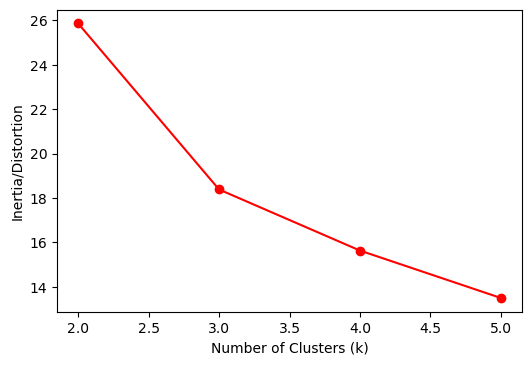

In [9]:
# Elbow Method for finding best k.

plt.figure(dpi=100)
plt.plot(kList , distortionList, marker="o",color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia/Distortion")
plt.show()

- We can see an elbow in K = 3 which can be a candidate. 
- Sometimes elbow method might not always give clear method, so we used silhouette coefficient as well.

### 3.2. SILHOUETTE COEFFICIENTS METHOD
- Silhouette coefficient is basically the mean of the scores of all data points. For each instance silhouette scores are calculated, then the average of these scores which give a metric to clustering result evaluated.

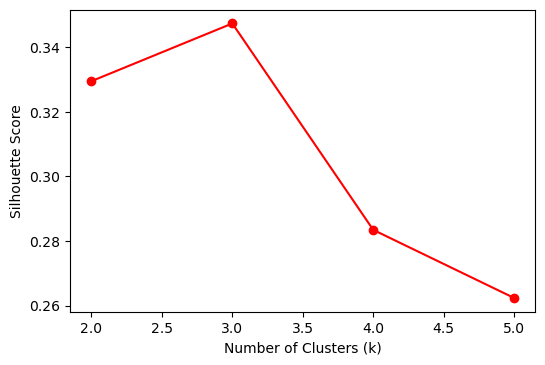

In [10]:
# Silhouette Scores for finding best k.

plt.figure(dpi=100)
plt.plot(kList , silhouetteList, marker="o",color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

As seen above, K = 3 gives the biggest silhouette score which gives the same K as elbow method. So, K = 3 chosen as optimal clusters and model fitted again.

In [11]:
# Model fitted again with K=3.

kmeans = KMeans(n_clusters = 3, n_init = 15)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15)

In [12]:
# Interpretation of Final Clusters

kmeans.cluster_centers_
results = pd.DataFrame(kmeans.cluster_centers_ , columns = X.columns)
results

GDP  Social support  Healthy life expectancy  Choice freedom  \
0  0.619939        0.808302                 0.714306        0.616230   
1  0.241131        0.537227                 0.371699        0.512506   
2  0.827413        0.921574                 0.872719        0.875018   

   Generosity  Perceptions of corruption  
0    0.257368                   0.155855  
1    0.383123                   0.225645  
2    0.485223                   0.636063

According to results;

- **Social support** value is close to 1 in cluster 2. 
- **Healthy life expectancy** value is close to 1 in 2 cluster as well. 
- In 2. cluster, most of the countries in these clusters have higher life expectancy. 
- On average, countries in the 2. cluster has more **corruptions**.
- **Generosity** of the 0. cluster is lower than others, so it can be said that these countries people are less kind and generous.


## 4. HIERARCHICAL CLUSTERING
### 4.1. AGGLOMERATIVE CLUSTERING
#### 4.1.1. WARD'S LINKAGE METHOD

- First 100 happiest countries are used in order to have a clear visualization, then scaled again.
- **linkage** function creates a lingage matrix. This matrix is used in dendogram which can be plotted 
using matplotlib.
- Also, to see the name of the countries **labels = df_scaled.index.to_list()** is used.


In [13]:
# Agglomerative Clustering and scaling filtered data.

df = df.iloc[0:100,:]
X = df.iloc[:, 3:9]
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(X)

df_scaled = pd.DataFrame(scaled_data, columns = X.columns, index = df["Country"])
df_scaled

GDP  Social support  Healthy life expectancy  \
Country                                                          
Finland      0.722132        0.956057                 0.829483   
Denmark      0.756866        0.939430                 0.840484   
Norway       0.841680        0.950119                 0.875688   
Iceland      0.754443        1.000000                 0.873487   
Netherlands  0.767367        0.878860                 0.843784   
...               ...             ...                      ...   
Cameroon     0.083199        0.152019                 0.108911   
Bulgaria     0.521809        0.868171                 0.641364   
Ghana        0.133279        0.102138                 0.279428   
Ivory Coast  0.099354        0.030879                 0.000000   
Nepal        0.000000        0.527316                 0.489549   

             Choice freedom  Generosity  Perceptions of corruption  
Country                                                             
Finland            0.937943    0.307229                   0.867550  
Denmark            0.930851    0.506024                   0.905077  
Norway             0.950355    0.544177                   0.752759  
Iceland            0.929078    0.710843                   0.260486  
Netherlands        0.868794    0.646586                   0.657837  
...                     ...         ...                        ...  
Cameroon           0.556738    0.375502                   0.081678  
Bulgaria           0.432624    0.162651                   0.008830  
Ghana              0.556738    0.491968                   0.088300  
Ivory Coast        0.505319    0.309237                   0.198675  
Nepal              0.659574    0.572289                   0.196468  

[100 rows x 6 columns]

In [14]:
# Ward's Linkage Method

plt.figure(dpi=2000)

linkage_matrix = linkage(df_scaled, method = "ward", metric = "euclidean")

dendrogram(linkage_matrix,labels = df_scaled.index.to_list())
plt.show()

- According to **ward's lingage** results, Turkey looks very similar to Belarus in terms of happiness scores. Serbia and Montenegro are next
similar countries to Turkey.

#### 4.1.2. SINGLE LINKAGE METHOD

In [15]:
# Single Linkage Method

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(dpi=2000)

linkage_matrix2 = linkage(df_scaled, method = "single", metric = "euclidean")

dendrogram(linkage_matrix2,labels = df_scaled.index.to_list())
plt.show()

- According to **single lingage** results, Turkey looks very similar to Serbia in terms of happiness scores. North Macedonia and Belarus are next similar countries to Turkey.

#### 4.1.3. COMPLETE LINKAGE METHOD

In [16]:
# Complete Linkage Method

plt.figure(dpi=2000)

linkage_matrix2 = linkage(df_scaled, method = "complete", metric = "euclidean")

dendrogram(linkage_matrix2,labels = df_scaled.index.to_list())
plt.show()

- According to **complete lingage** results, Turkey looks very similar to Belarus in terms of happiness scores. Hungry, Serbia and Montenegro are next similar countries to Turkey.

#### 4.1.4. AVERAGE LINKAGE METHOD

In [17]:
# Average Linkage Method

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(dpi=2000)

linkage_matrix2 = linkage(df_scaled, method = "average", metric = "euclidean")

dendrogram(linkage_matrix2,labels = df_scaled.index.to_list())
plt.show()

- According to **average linkage** results, Turkey looks very similar to Belarus in terms of happiness scores. Serbia and Montenegro are next similar countries to Turkey.
- To compare linkage methods, we can say that they give similar results but not all of the hierarchy results are same.

In [18]:
# Single Linkage Silhouette Scores calculated.

agg = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
agg.fit_predict(df_scaled)
agg.labels_
single_agg_score = silhouette_score(df_scaled, agg.labels_)

In [19]:
# Single Linkage Silhouette Scores calculated.

agg2 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

agg2.fit_predict(df_scaled)
agg2.labels_
ward_agg_score = silhouette_score(df_scaled, agg2.labels_)

In [20]:
# Single Linkage Silhouette Scores calculated.

agg3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

agg3.fit_predict(df_scaled)
agg3.labels_
comp_agg_score = silhouette_score(df_scaled, agg3.labels_)

In [21]:
# Single Linkage Silhouette Scores calculated.

agg4 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')

agg4.fit_predict(df_scaled)
agg4.labels_
avg_agg_score = silhouette_score(df_scaled, agg4.labels_)

In [22]:
# Silhouette Score results printed.

print('Silhouette Scores')
print('-----------------')
print("Single Linkage: ", format(single_agg_score,',.4f'))
print("Ward's Linkage: ", format(ward_agg_score,',.4f'))
print("Complete Linkage: ", format(comp_agg_score,',.4f'))
print("Average Linkage: ", format(avg_agg_score,',.4f'))

Silhouette Scores
-----------------
Single Linkage:  0.0740
Ward's Linkage:  0.3139
Complete Linkage:  0.3172
Average Linkage:  0.3350


## 5. DENSITY BASED CLUSTERING

- In dbscan algorithm there are two parameters: **minimum points** and **eps**. Random dataset created for clustering using **make_blobs** function.

In [23]:
# Density Based Clustering
# K = 6 is chosen for minimum points.

neighbours=NearestNeighbors(n_neighbors=6)
neighbours.fit(X)

NearestNeighbors(n_neighbors=6)

In [24]:
# Returning indices and distances to the neighbors of each point.

distances,indices=neighbours.kneighbors(X)
distances

array([[0.        , 0.11068424, 0.16315024, 0.18695187, 0.18838259,
        0.18920095],
       [0.        , 0.09746281, 0.11068424, 0.12078493, 0.12294714,
        0.13180668],
       [0.        , 0.07769813, 0.10517604, 0.13180668, 0.13953853,
        0.14651962],
       [0.        , 0.14214078, 0.19277967, 0.21440382, 0.22262525,
        0.23551008],
       [0.        , 0.0527731 , 0.07104928, 0.10171037, 0.10812955,
        0.11811435],
       [0.        , 0.07769813, 0.09227676, 0.10015987, 0.10581588,
        0.10812955],
       [0.        , 0.0797308 , 0.09227676, 0.09746281, 0.10171037,
        0.12679905],
       [0.        , 0.11760102, 0.11801271, 0.12078493, 0.128     ,
        0.13481469],
       [0.        , 0.07104928, 0.07189576, 0.0797308 , 0.10015987,
        0.11251222],
       [0.        , 0.06685806, 0.11251222, 0.11372775, 0.12161826,
        0.13494443],
       [0.        , 0.0527731 , 0.07189576, 0.11760102, 0.12220884,
        0.12275993],
       [0.        , 0

In [25]:
# Dimension of the distances interpreted.

distances.shape

(100, 6)

In [26]:
# Average distances are calculated and sorted.

average_distances=distances[:,1:].mean(axis=1)
average_distances_sorted=np.sort(average_distances)

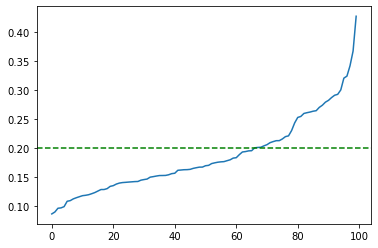

In [27]:
# Data plotted, to see any point has a sharp change for eps values.

plt.plot(average_distances_sorted)
plt.axhline(0.20,**dict(ls="--",color="g"))

- For minimum points = 6, eps value seems to fall between 0.20 and 0.25.